# <b> Group 4 <b>
#### Will Fink, Aiden Browne, Azeh Ndifor, Diana Sethna, Jyotleen DeWal, Zeynep Uzun, Shivani Virani

## <b> Q2: _IF model_ <b>

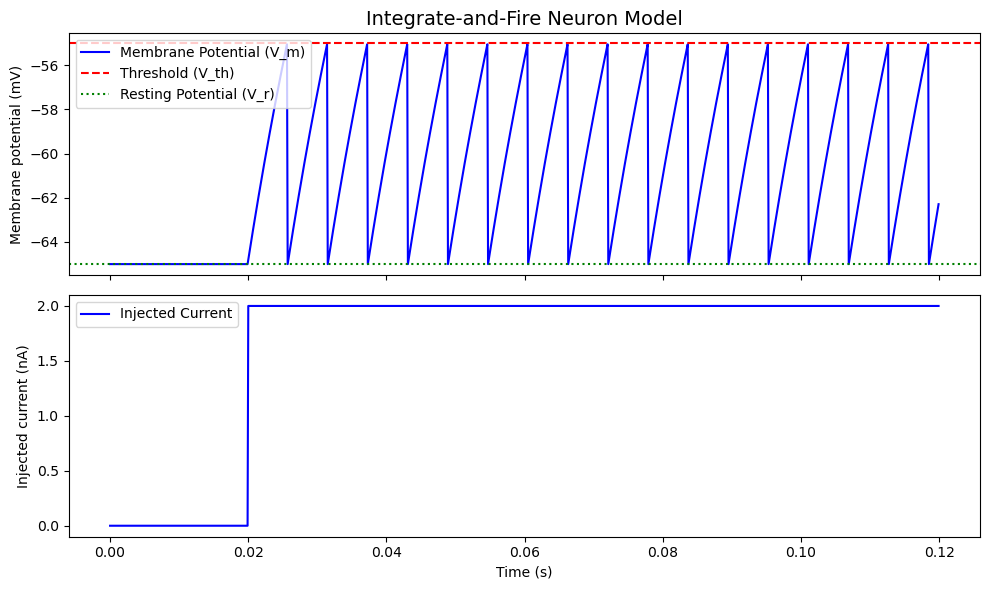

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.0001  # Time step (s)
T = 0.12     # Total simulation time (s)
time = np.arange(0, T, dt)

# Model parameters
V_rest = -65  # Resting potential (mV)
V_th = -55    # Threshold potential (mV)
V_reset = -65 # Reset potential (mV)
R_m = 10      # Membrane resistance (MOhm)
tau_m = 10e-3 # Membrane time constant (s)

# Input current (step current)
I_injected = np.zeros_like(time)
I_injected[int(0.02 / dt):] = 2.0  # Current of 2 nA applied after 20 ms

# Initialize membrane potential
V_m = np.ones_like(time) * V_rest
spikes = []

# Simulate the neuron
for t in range(1, len(time)):
    if V_m[t-1] >= V_th:
        V_m[t-1] = V_reset  # Reset after spike
        spikes.append(time[t-1])
    
    # Modified update rule for a more linear rise
    dV = ((V_rest - V_m[t-1]) + R_m * I_injected[t]) / tau_m * dt
    V_m[t] = V_m[t-1] + dV * 0.5 + 0.5 * (R_m * I_injected[t] * dt / tau_m)  # Adjusting for more linear rise

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential (V_m)", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (V_th)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (V_r)")
axes[0].set_ylabel("Membrane potential (mV)")
axes[0].legend()
axes[0].set_title("Integrate-and-Fire Neuron Model", fontsize=14)

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="blue")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Injected current (nA)")
axes[1].legend()

plt.tight_layout()
plt.show()


## <b> Q2: _HH model_ <b>

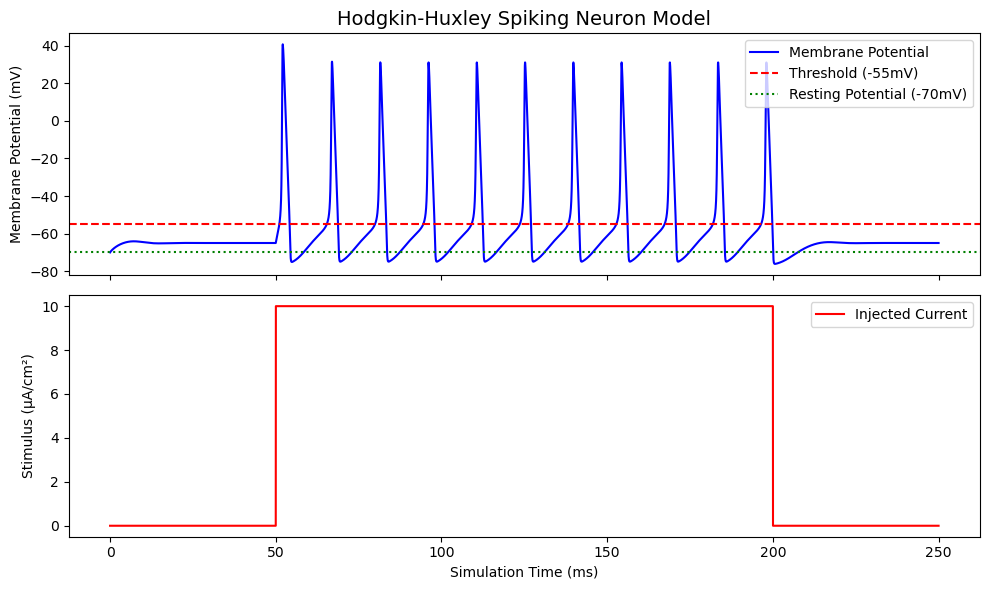

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -70  # Resting potential (mV)
V_th = -55 # Threshold potential (mV)

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (step current)
I_injected = np.zeros_like(time)
I_injected[int(50 / dt):int(200 / dt)] = 10  # Current applied between 50ms and 200ms

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-70mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Spiking Neuron Model", fontsize=14)
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


## <b> Q2: _Feedforward Neural Network Model_ <b>

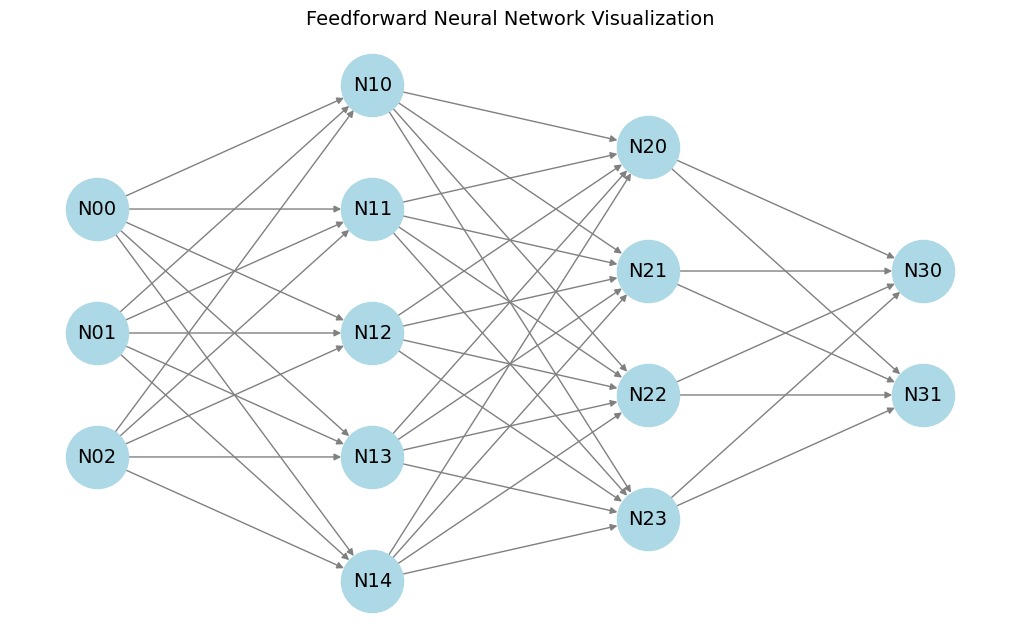

In [135]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_fnn(layer_sizes):
    """
    Draws a feedforward neural network diagram.
    :param layer_sizes: List containing the number of neurons in each layer.
    """
    G = nx.DiGraph()
    pos = {}
    node_labels = {}
    
    x_spacing = 2  # Space between layers
    y_spacing = 1  # Space between neurons
    
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            node_id = (i, j)
            G.add_node(node_id)
            pos[node_id] = (i * x_spacing, -j * y_spacing + (layer_size - 1) * y_spacing / 2)
            node_labels[node_id] = f'N{i}{j}'
    
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                G.add_edge((i, j), (i + 1, k))
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=14, edge_color='gray')
    plt.title("Feedforward Neural Network Visualization", fontsize=14)
    plt.show()

# Example usage
draw_fnn([3, 5, 4, 2])




## <b> Q3: _Discussing and Comparing Models_ <b>

The Integrate-and-Fire (IF) model is the simplest way to represent how a neuron works. It acts like a bucket collecting water: when it fills up to a certain level (threshold), it spills over (fires a signal) and then resets. In other words, the neuron is modeled to integrate incoming currents until a threshold is reached and a spike is generated. After this, the neuron fully resets. This model is easy to use in large simulations as it is computationally efficient but is not realistic because biological neurons demonstrate a refractory period and ion channels. Gradual graded potentials, their ability to decay, and the progressive repolarization following a spike is not shown.

A small improvement is the Leaky Integrate-and-Fire (LIF) model, which adds a "leak” component of ion channels. This means that the neuron loses some charge over time, making it behave more like a real cell. While this model is still computationally simple and has more biological relevance than the IF model, it still does not account for voltage gated ion channels. 

The Hodgkin-Huxley (HH) model provides a more detailed representation of a biological neuron. It tracks the flow of specific ions (like sodium and potassium) through voltage gated ion channels in a neuron, which makes it highly realistic but requires a lot of computing power to simulate. Additionally, it assumes the structures, i.e. the ion channels, behave in a uniform manner.

Feedforward neural networks (FNN), on the other hand, are designed for tasks like pattern recognition and prediction making. Information within a FNN moves in one direction: the input goes in, gets processed in the hidden layers, and comes out as an answer. These kinds of networks are used often in AI but can’t capture how biological neurons actually work. The IF model is a basic way to show how a neuron works. It collects signals until it reaches a limit, then fires and resets. This model is easy to use in large simulations but is not very realistic since real neurons have recovery times and ion channels. The LIF model improves this by allowing some charge to leak out over time, making it more like a real neuron while still being simple to use. The HH model is the most accurate because it tracks how specific ions move through channels, but it needs a lot of computing power. Unlike these neuron models, ANNs are used in AI to recognize patterns and make predictions and update information flow and weighting using backpropagation, which has not been shown in biological neurons (though analogies may be made with feedback motifs). They process information step by step and break down information similarly to some biological systems, such as the visual system, however their mechanism of "summation" through assigning weights to inputs in hidden layers merely mimics spatial and temporal summation in real neurons.

Information Theory demonstrates that the complexity and amount of information contained within each model varies significantly. This can be thought of in terms of bits of information where more bits represents a greater amount of encoded data. The IF model is the most concise and contains the fewest bits of information as it simplifies neuronal function down to a basic threshold mechanism. A simple binary output can indicate if a neuron will spike or not. The LIF model introduces a “leaky” component which slightly increases the complexity. This means it requires more bits of information compared to the IF model. However, this model is still relatively simple computationally. 

The HH model uses many more bits of information as it tracks the movement of ions such as sodium and potassium through voltage gated channels. This makes this model very detailed but also computationally expensive. Instead of modeling individual neuron dynamics, FNNs take in inputs and apply weights to them. Therefore, the amount of bits of information in a FNN will depend on how many neurons it is modeling and how many connections are present among that subset of neurons. FNNs can therefore encode far more data than the HH model and this makes it much more complex than the previous models. However, this complexity is different as it does not model specific biological function of neurons but instead models the learning patterns of an entire subset of a neuronal population. 

## <b> Q4: _Model with Differing Inputs_

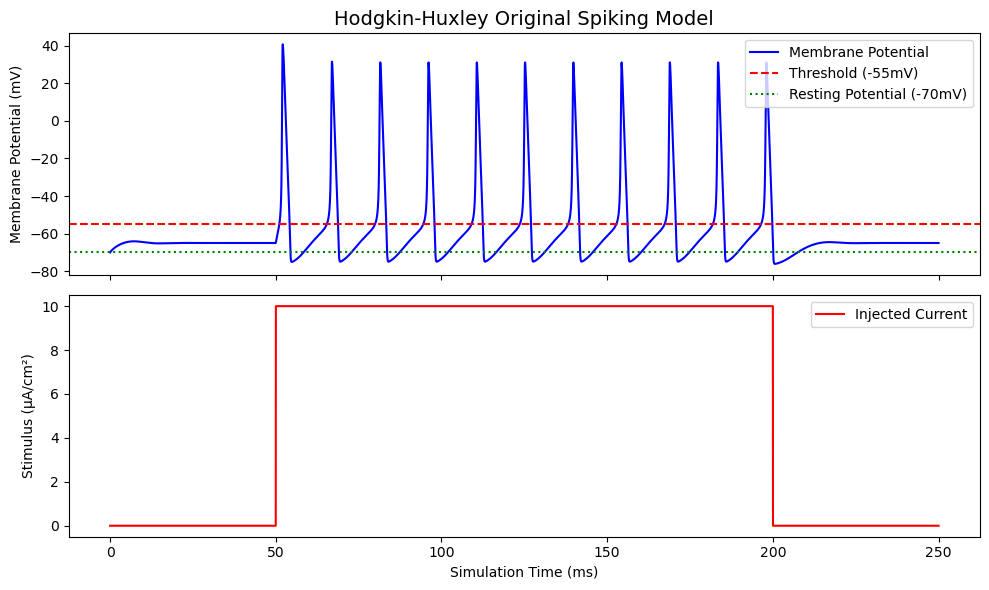

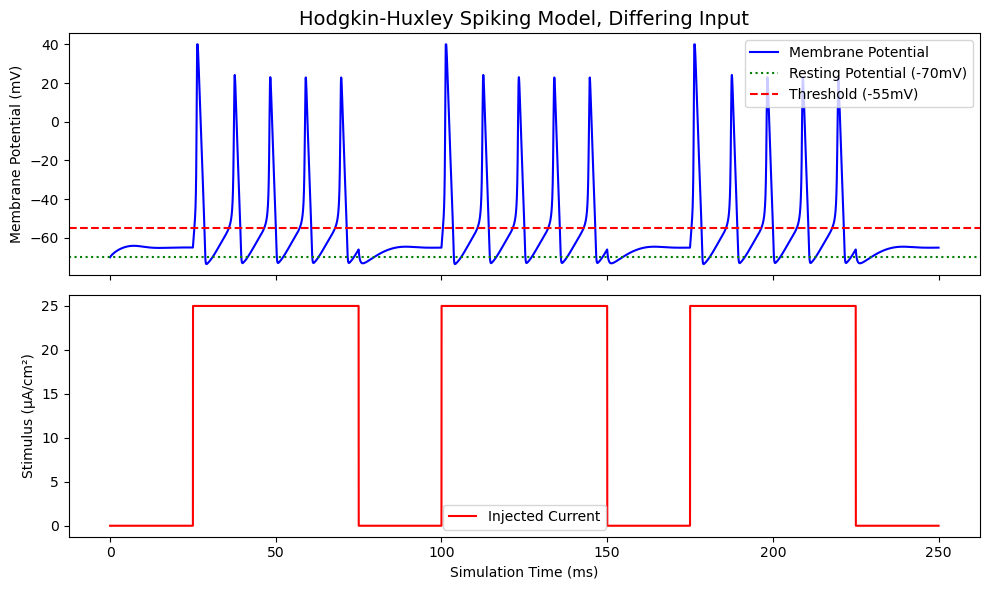

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -70  # Resting potential (mV)
V_th = -55 # Threshold potential (mV)

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (step current)
I_injected = np.zeros_like(time)
I_injected[int(50 / dt):int(200 / dt)] = 10  # Current applied between 50ms and 200ms

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-70mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Original Spiking Model", fontsize=14)
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -70  # Resting potential (mV)
V_th = -55

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (Altered to produce more firing)
I_injected = np.zeros_like(time)
I_injected[int(25 / dt):int(75 / dt)] = 25  # Current applied between 25ms and 100ms
I_injected[int(100 / dt):int(150 / dt)] = 25  # Current applied between 125ms and 200ms
I_injected[int(175 / dt):int(225 / dt)] = 25

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

    # Limiting the membrane potential to not overshoot too much
    if V_m[t] > 40:  # Cap the voltage at the peak
        V_m[t] = 40

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-70mV)")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Spiking Model, Differing Input", fontsize=14)
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


The original Hodgkin-Huxley model from Question 2-- titled "Hodgkin-Huxley Original Spiking Model"-- is shown. The altered HH model with differing bursting inputs-- titled "Hodgkin-Huxley Spiking Model, Differing Input"-- is shown below the original model. 

The injected current was changed to occur in bursts over time 0 to time 250, as opposed to one instance of injected current. This was done through adding multiple "I_injected" lines of code; instead of one current application:

_(I_injected[int(50 / dt):int(200 / dt)] = 10)_,

three intervals were added:

_(I_injected[int(25 / dt):int(75 / dt)] = 25
I_injected[int(100 / dt):int(150 / dt)] = 25
I_injected[int(175 / dt):int(225 / dt)] = 25)_. 

Additionally, the currents were equated to a higher current injection of 25 uA/cm^2, as opposed to the original 10 uA/cm^2. This allowed for more spikes over a given time span. Compared to the original model, in which there were around 4 spikes after 50 ms of injected current, the newer model has around 5 spikes after the same amount of stimulation. Between each interval in the updated model, there is about 25 ms of no stimulation. As expected, the spiking during this interval ceases. This change in the code allowed for the model to show a new bursting firing pattern instead of the constant spike train that was shown before.

## <b> Q5: _Inhibitory Inputs_

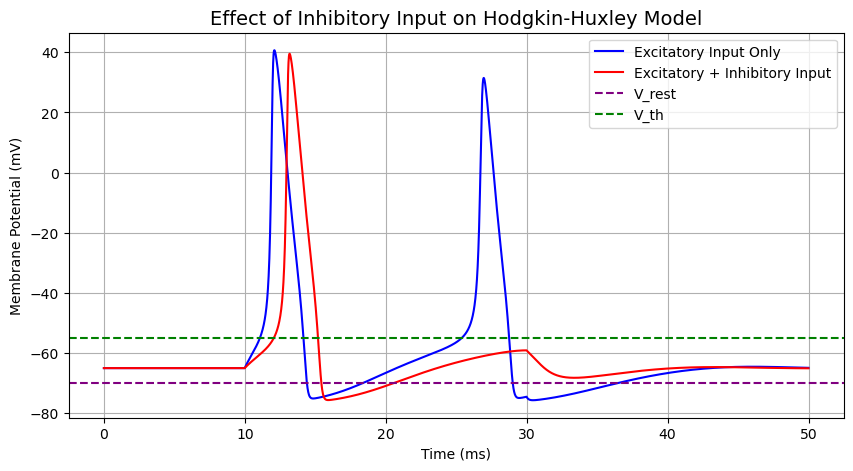

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Hodgkin-Huxley Model Parameters
C_m = 1.0  # Membrane capacitance, in uF/cm^2
g_Na = 120.0  # Maximum conductance of Na+ channels (mS/cm^2)
g_K = 36.0  # Maximum conductance of K+ channels (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium reversal potential (mV)
E_K = -77.0  # Potassium reversal potential (mV)
E_L = -54.4  # Leak reversal potential (mV)
V_rest = -70  # Resting potential (mV)
V_th = -55

# Time parameters
dt = 0.01  # Time step (ms)
T = 50.0  # Total simulation time (ms)
time = np.arange(0, T, dt)

# External currents
I_exc = np.zeros(len(time))
I_exc[1000:3000] = 10  # Excitatory input applied between 10ms-30ms

I_inh = np.zeros(len(time))
I_inh[1000:3000] = -5  # Inhibitory input applied during the same period

# Hodgkin-Huxley gating functions
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-0.0556 * (V + 65))
def alpha_h(V): return 0.07 * np.exp(-0.05 * (V + 65))
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Function to integrate HH model
def simulate_HH(I_ext):
    V = -65.0  # Initial membrane potential (mV)
    m = alpha_m(V) / (alpha_m(V) + beta_m(V))
    h = alpha_h(V) / (alpha_h(V) + beta_h(V))
    n = alpha_n(V) / (alpha_n(V) + beta_n(V))

    V_trace = []  # To store membrane potential over time

    for t in time:
        # Compute conductances
        m += dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
        h += dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
        n += dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Compute currents
        I_Na = g_Na * m**3 * h * (V - E_Na)
        I_K = g_K * n**4 * (V - E_K)
        I_L = g_L * (V - E_L)

        # Update voltage
        V += dt * (I_ext[int(t/dt)] - I_Na - I_K - I_L) / C_m

        # Store result
        V_trace.append(V)

    return np.array(V_trace)

# Simulate both cases
V_exc = simulate_HH(I_exc)  # Excitatory input only
V_inh = simulate_HH(I_exc + I_inh)  # Excitatory + Inhibitory input

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(time, V_exc, label="Excitatory Input Only", color="blue")
plt.plot(time, V_inh, label="Excitatory + Inhibitory Input", color="red")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Effect of Inhibitory Input on Hodgkin-Huxley Model", fontsize=14)
plt.axhline(y=-70, color='purple', linestyle='--', label='V_rest')
plt.axhline(y=-55, color='green', linestyle='--', label='V_th')
plt.legend()
plt.grid()
plt.show()


The blue line represents excitatory input only, and shows normal action potentials when the input is applied. The red line represents the application of both excitatory and inhibitory inputs. In the code, the inhibitory input is applied at t = 10 sec, and continues until t = 30 sec. This is done through the following code, where an array is modified to represent an input of -5uA/cm^2 from time 10ms to 30ms, in addition to the original +10uA/cm^2 excitatory input:

_I_exc = np.zeros(len(time))
I_exc[1000:3000] = 10_

_I_inh = np.zeros(len(time))
I_inh[1000:3000] = -5_

The first action potential with the inhibitory input occurs, which results in an action potential. However, when the inhibitory input takes effect on the second spike, the firing is suppressed, resulting in reduced/delayed action potentials. The negative current from the inhibitory input hyperpolarizes the membrane potential, counteracting the depolarizing effect from the excitatory input, reducing the likelihood of reaching the membrane threshold. Since the inhibition is applied after the depolarization has already started and is not very strong, the inhibition  does not prevent the first action potential. It mainly affects later spikes, demonstrating the effect of inhibitory currents on neuronal firing patterns.

## <b> Q6: _Lateral Inhibition in the Visual System_

Lateral inhibition is a motif in which an activated neuron inhibits a neuron laterally, or to the side of it. This allows for increased acuity and enhanced contrast in sensory perception. In the visual system, horizontal cells are the “neighboring,” lateral interneurons that allow for contrast in center and surround receptive field detection.

In [3]:
from IPython.display import display, HTML
from PIL import Image

img = Image.open("images/lateralinhibition.png")
resized_img = img.resize((300, 300), Image.LANCZOS)

resized_img.save("resized_lateralinhibition.png")

display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="resized_lateralinhibitionvision.png" width="300">
        <p style="font-size: 14px; color: #555; font-style: italic; text-align: center;">Schema representing lateral inhibition. The excitation of the center, green neuron leads to the activation of depicted red neurons; neighboring neurons are inhibited laterally as a result.</p>
    </div>
"""))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zeynepuzun/images/lateralinhibition.png'

Horizontal cells will increase the localization of stimuli. If light was shone on the center of a receptive field in an on-center, off-surround receptive field, the depolarization of the photoreceptor in the surround, due to dark conditions, will signal for glutamate release onto horizontal cells. These horizontal cells then release GABA, a major inhibitory transmitter, onto lateral on-center photoreceptors, further inhibiting their glutamate release. The lack of glutamate release from the on-center cell, both from hyperpolarizing dark conditions and lateral inhibition from horizontal cells, will depolarize on-center bipolar cells. This leads to the depolarization of on-center retinal ganglion cells, ultimately allowing for the perception of light in the local region. The role of horizontal cells in the mammalian retina have been further proven through the use of GABA agonists; [upon applying these GABA agonists, neurotransmitter release is suppressed in a similar manner to normal endogenous response to light conditions](https://doi.org/10.1371/journal.pbio.3000200).

In [183]:
from IPython.display import display, HTML
from PIL import Image

img = Image.open("images/lateralinhibitionvision.png")
resized_img = img.resize((300, 300), Image.LANCZOS)

resized_img.save("images/resized_lateralinhibitionvision.png")

display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="images/resized_lateralinhibitionvision.png" width="300">
        <p style="font-size: 14px; color: #555; font-style: italic; text-align: center;">Adapted from Neuroscience: Exploring the Brain, 3rd Ed. Bear, Connors, and Paradiso.</p>
    </div>
"""))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zeynepuzun/images/lateralinhibitionvision.png'

While current research shows that there may be horizontal cell involvement in contrast perception by rods, the utility of these cells was first identified in cone activation. Novel findings were made using the horseshoe crab, _Limulus polyphemus_, [in which it was discovered that a single nerve fiber, though it may be preferentially activated by a single receptor, is affected by the activation of neighboring receptors in an inhibitory fashion]( https://doi.org/10.1085/jgp.39.5.651). These findings were solidified in cat experiments; notably, [geniculate on-center cells receive information from an on-center fiber, along with inhibitory inputs from neighboring off-center fibers](https://doi.org/10.1007/BF00235054).

The visual system could also be modeled using an ANN. We could think of each photoreceptor, rod or cone, as an input node. These photoreceptors detect contrast by inhibiting neighboring photoreceptors. We can model this by having each input node send an input with a negative weight to its neighboring nodes. These input nodes would then converge onto the hidden layer which would represent the bipolar cells. This hidden layer would then further converge into the output layer which would represent the retinal ganglion cells.

Below is an ANN modeling lateral inhibition using convolution. An input layer of a 5x5 grid of photoreceptors is used. In this example, a bright stimulus is received in the center of a receptive field. Lateral inhibition is employed using a convolution filter in which the center receives a positive weight of 1.0, and the surround receives negative weights of -0.2. This mimics the actions of horizontal cells enhancing the center effects. These converge on the output layer.

In [170]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Define input shape (e.g., a 5x5 grid of photoreceptors)
input_shape = (5, 5, 1)


# Define lateral inhibition kernel (center-surround difference)
lateral_kernel = np.array([[-0.1, -0.2, -0.1],
                            [-0.2,  1.0, -0.2],
                            [-0.1, -0.2, -0.1]])
lateral_kernel = lateral_kernel[:, :, np.newaxis, np.newaxis]


# Build the model
inputs = keras.Input(shape=input_shape)


# Convolution layer to simulate lateral inhibition
lateral_inhibition = layers.Conv2D(1, (3, 3), padding="same", use_bias=False,
                                   kernel_initializer=keras.initializers.Constant(lateral_kernel))(inputs)


# Activation function (ReLU to model contrast enhancement)
output = layers.ReLU()(lateral_inhibition)


# Define the model
model = keras.Model(inputs, output)


# Print model summary
model.summary()


# Example input: a 5x5 grid with a bright center stimulus
example_input = np.zeros((1, 5, 5, 1))
example_input[0, 2, 2, 0] = 1.0  # Bright stimulus at center


# Run model
output = model.predict(example_input)


# Display input and output
print("Input stimulus:")
print(example_input[0, :, :, 0])
print("\nProcessed output after lateral inhibition:")
print(output[0, :, :, 0])


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 1)        │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 5, 5, 1)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Input stimulus:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Processed output after lateral inhibition:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
